## Atividade 04

Ana Julia Wolmann Silveira

Analise um dado de sua escolha no tempo e no espaço, utilizando as bibliotecas xarray, geopandas, netCDF4. Se preferirem, podem analisar apenas no espaço (no caso de um raster).

Vocês deverão preparar uma apresentação para o dia 05/12. Esta será a forma entrega desta atividade. 

In [105]:
# Pacotes e bibliotecas utilizadas

import os
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs  # Sistema de coordenadas Cartopy
import cartopy.feature as cfeature  # Fronteiras
import numpy as np
import geopandas as gpd

In [106]:
# Caminhos para a pasta de dados
# Pasta atual
pastaAtual = os.getcwd()
print(pastaAtual)

# Pasta de dados
pastaDados = r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\dados_de_entrada'
listaDados = os.listdir(pastaDados)

# Listando arquivos
print(listaDados)

# Selecionando arquivos do MERRA2
prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith("MERRA2")]
print(prefixed)

C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064
['.ipynb_checkpoints', 'BR_Pais_2022.shp', 'BR_Pais_2022.shx', 'cb_2018_us_county_500k.shp', 'cb_2018_us_county_500k.shx', 'ClipBR.nc', 'gadm41_USA_0.shp', 'gadm41_USA_0.shx', 'limite_fpolis.shp', 'limite_fpolis.shx', 'MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'ne_10m_admin_0_countries.shp', 'ne_10m_admin_0_countries.shx', 'ne_10m_admin_0_countries_usa.shp', 'ne_10m_admin_0_countries_usa.shx', 'SC.csv', 'SC_Municipios_2022.shp', 'SC_Municipios_2022.shx', 'tl_2024_us_state.shp', 'tl_2024_us_state.shx', 'TROPESS_reanalysis_mon_t_2021.nc']
['MERRA2_HAQAST_CNN_L4_V1.20240505.nc4']


In [107]:
# Carregar o dataset de emissões de PM2,5
dataset = xr.open_dataset(pastaDados+'\\'+prefixed[0])

# Exibir informações básicas do dataset
print(dataset)

<xarray.Dataset> Size: 22MB
Dimensions:                  (time: 24, lat: 361, lon: 576)
Coordinates:
  * time                     (time) datetime64[ns] 192B 2024-05-05T00:30:00 ....
  * lat                      (lat) float32 1kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * lon                      (lon) float32 2kB -180.0 -179.4 ... 178.8 179.4
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 20MB ...
    QFLAG                    (lat, lon) float64 2MB ...
Attributes: (12/33)
    Comment:                           filename: MERRA2_HAQAST_CNN_L4_V1_2024...
    Filename:                          MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Conventions:                       CF-1
    Institution:                       NASA Goddard Space Flight Center
    References:                        http://gmao.gsfc.nasa.gov ; https://do...
    Format:                            NetCDF-4/HDF-5
    ...                                ...
    RangeEndingDate:                   2024-05-05
    Ra

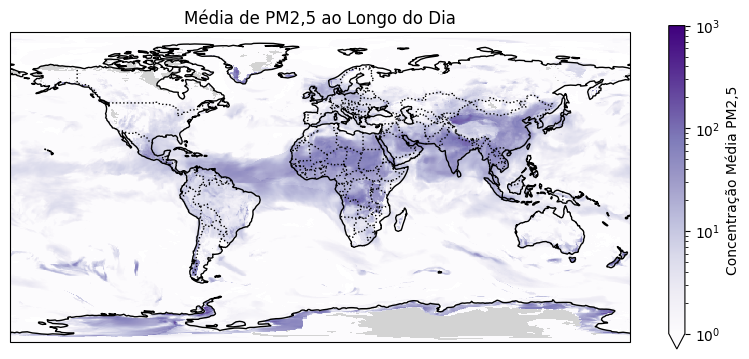

In [108]:
# Criar a figura e especificar a projeção
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Selecionar a média emissão do dia (substitua 'mean_emission' pelo nome correto do seu dado, se necessário)
# Exemplo:
mean_emission = dataset['MERRA2_CNN_Surface_PM25'].mean(dim='time')

# Plotar os dados de média emissão do dia
mean_emission.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', norm=norm, cbar_kwargs={'shrink': 0.7, 'label': 'Concentração Média PM2,5'})

# Adicionar o mapa-múndi com costas e fronteiras
ax.coastlines()  # Desenhar as linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Adicionar fronteiras dos países
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Adicionar continentes em cinza claro

# Título
plt.title('Média de PM2,5 ao Longo do Dia')

# Exibir o gráfico
plt.show()

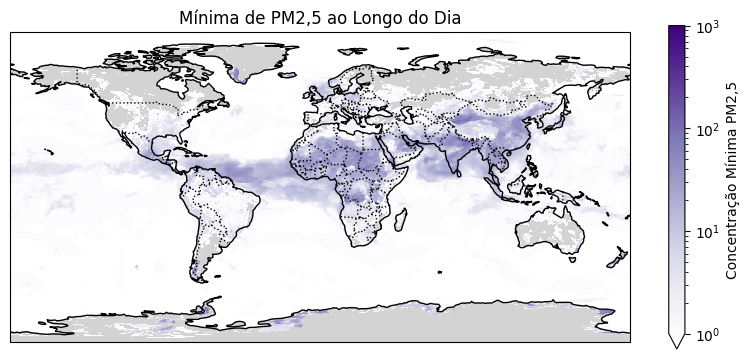

In [109]:
# Criar a figura e especificar a projeção
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Selecionar a mínima emissão do dia (você deve substituir 'min_emission' com o nome correto do seu dado)
# Exemplo:
min_emission = dataset['MERRA2_CNN_Surface_PM25'].min(dim='time')

# Plotar os dados de mínima emissão do dia
min_emission.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', norm=norm, cbar_kwargs={'shrink': 0.7, 'label': 'Concentração Mínima PM2,5'})

# Adicionar o mapa-múndi com costas e fronteiras
ax.coastlines()  # Desenhar as linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Adicionar fronteiras dos países
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Adicionar continentes em cinza claro

# Título
plt.title('Mínima de PM2,5 ao Longo do Dia')

# Exibir o gráfico
plt.show()


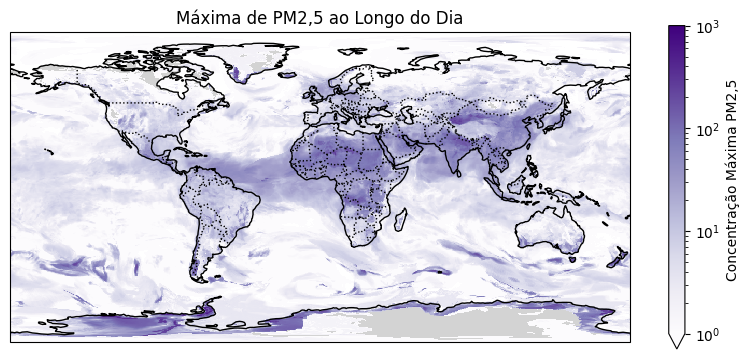

In [110]:
# Criar a figura e especificar a projeção
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Selecionar a máxima emissão do dia (você deve substituir 'max_emission' com o nome correto do seu dado)
# Exemplo:
max_emission = dataset['MERRA2_CNN_Surface_PM25'].max(dim='time')

# Plotar os dados de máxima emissão do dia
max_emission.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', norm=norm, cbar_kwargs={'shrink': 0.7, 'label': 'Concentração Máxima PM2,5'})

# Adicionar o mapa-múndi com costas e fronteiras
ax.coastlines()  # Desenhar as linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Adicionar fronteiras dos países
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Adicionar continentes em cinza claro

# Título
plt.title('Máxima de PM2,5 ao Longo do Dia')

# Exibir o gráfico
plt.show()


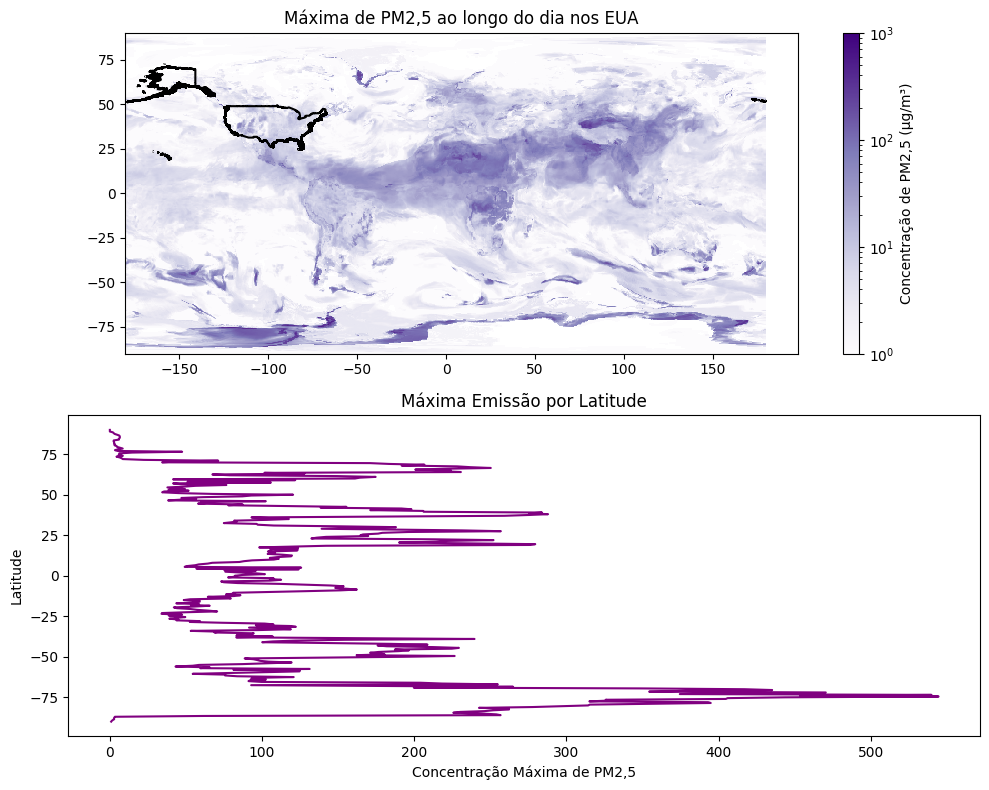

In [111]:
# Carregar shapefile dos EUA
usa = gpd.read_file(r"C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\dados_de_entrada\gadm41_USA_0.shp")

# Selecionar os dados de PM2,5 do dataset
pm25 = dataset['MERRA2_CNN_Surface_PM25']  # Substitua pelo nome correto da variável no dataset

# Criar subgráficos 2x1
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # 2 linhas, 1 coluna

# Máxima do dia em todos os locais
max_pm25 = np.max(pm25, axis=0)  # Calcular o máximo ao longo do tempo
im = ax[0].pcolor(dataset['lon'][:], dataset['lat'], max_pm25, cmap='Purples',norm=norm)
usa.boundary.plot(ax=ax[0], edgecolor='black')
ax[0].set_title("Máxima de PM2,5 ao longo do dia nos EUA")

# Associar a colorbar ao gráfico de pcolor
cbar = fig.colorbar(im, ax=ax[0])  # Associar ao objeto `im`
cbar.set_label("Concentração de PM2,5 (µg/m³)")

# Máxima emissão em todas as latitudes
lat_max_emission = np.max(np.max(pm25, axis=0), axis=1)  # Obter máximo por latitude
ax[1].plot(lat_max_emission, dataset['lat'][:], color='purple')
ax[1].set_title("Máxima Emissão por Latitude")
ax[1].set_xlabel("Concentração Máxima de PM2,5")
ax[1].set_ylabel("Latitude")

# Ajustar layout e exibir gráfico
plt.tight_layout()
plt.show()

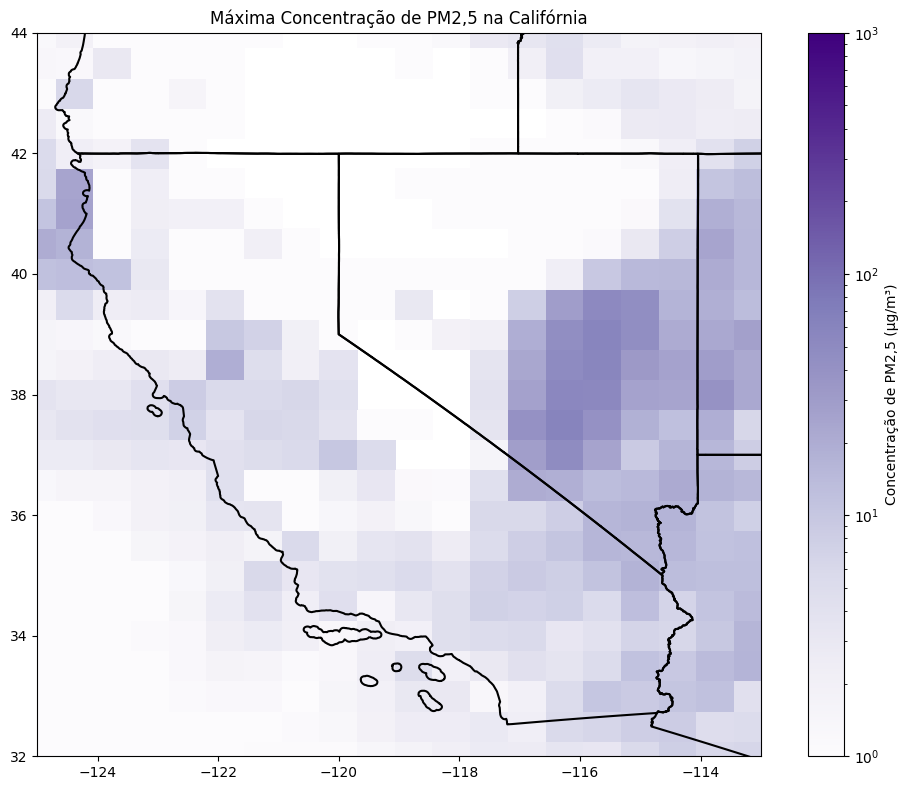

In [112]:
# Carregar shapefile dos EUA
usa = gpd.read_file(r"C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\dados_de_entrada\tl_2024_us_state.shp")
                         
# Selecionar os dados de PM2,5 do dataset
pm25 = dataset['MERRA2_CNN_Surface_PM25']  # Substitua pelo nome correto da variável no dataset

# Calcular o máximo de PM2,5 ao longo do tempo
max_pm25 = np.max(pm25, axis=0)

# Configurar o plot
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 8))  # 1 plot grande

# Plotar o mapa de concentração de PM2,5
im = ax.pcolor(dataset['lon'][:], dataset['lat'], max_pm25, cmap='Purples', norm=norm)

# Adicionar o contorno da Califórnia
usa.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)

# Ajustar título e colorbar
ax.set_title("Máxima Concentração de PM2,5 na Califórnia")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Concentração de PM2,5 (µg/m³)")

# Ajustar limites do eixo para focar na Califórnia
ax.set_xlim([-125, -113])  # Ajuste baseado nos limites longitudinais da Califórnia
ax.set_ylim([32, 44])      # Ajuste baseado nos limites latitudinais da Califórnia

# Mostrar o gráfico
plt.tight_layout()
plt.show()

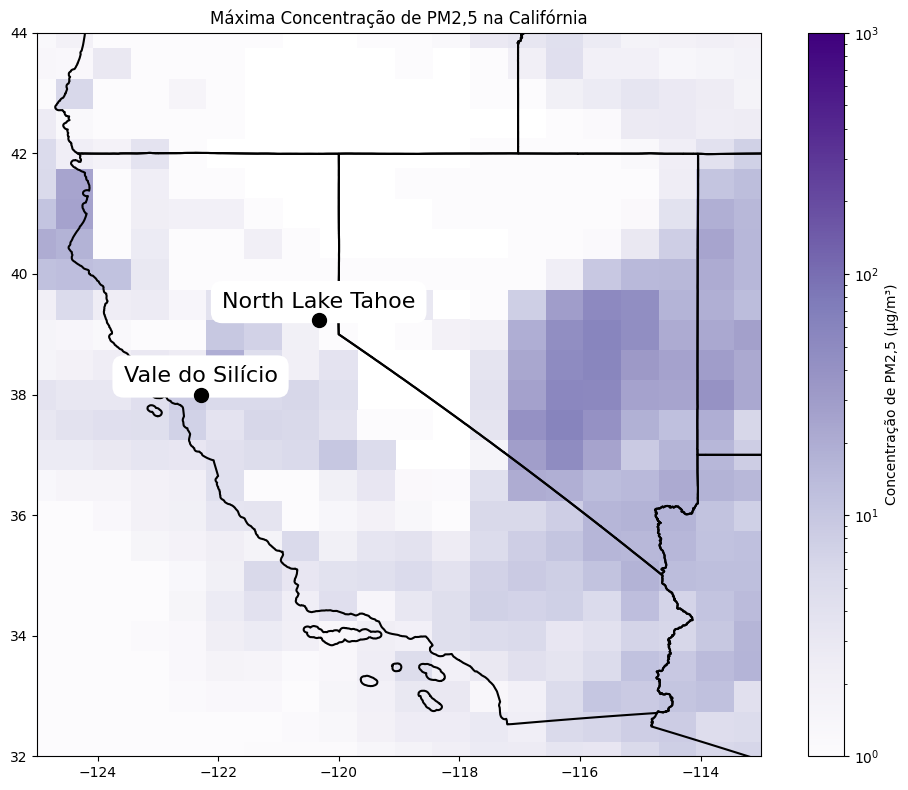

In [128]:
# Carregar shapefile dos EUA
usa = gpd.read_file(r"C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\dados_de_entrada\tl_2024_us_state.shp")
                         
# Selecionar os dados de PM2,5 do dataset
pm25 = dataset['MERRA2_CNN_Surface_PM25']  # Substitua pelo nome correto da variável no dataset

# Calcular o máximo de PM2,5 ao longo do tempo
max_pm25 = np.max(pm25, axis=0)

norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 8))  # 1 plot grande
im = ax.pcolor(dataset['lon'][:], dataset['lat'], max_pm25, cmap='Purples', norm=norm)

# Adicionar o contorno da Califórnia
usa.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)

# Adicionar pontos pretos no gráfico
latitudes = [39.2345, 38]  # Lake Tahoe e Vale do Silício
longitudes = [-120.3334, -122.2930]
nomes = ["North Lake Tahoe", "Vale do Silício"]
for lon, lat, nome in zip(longitudes, latitudes, nomes):
    ax.text(lon, lat + 0.2, nome, fontsize=16, ha='center', color='black', 
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'), zorder=2)

# Plotar os pontos
ax.plot(longitudes, latitudes, 'ko', markersize=10, label="Pontos escolhidos", zorder=3)
ax.set_title("Máxima Concentração de PM2,5 na Califórnia")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Concentração de PM2,5 (µg/m³)")


# Ajustar limites do eixo para focar na Califórnia
ax.set_xlim([-125, -113])  
ax.set_ylim([32, 44])      

plt.tight_layout()
plt.show()


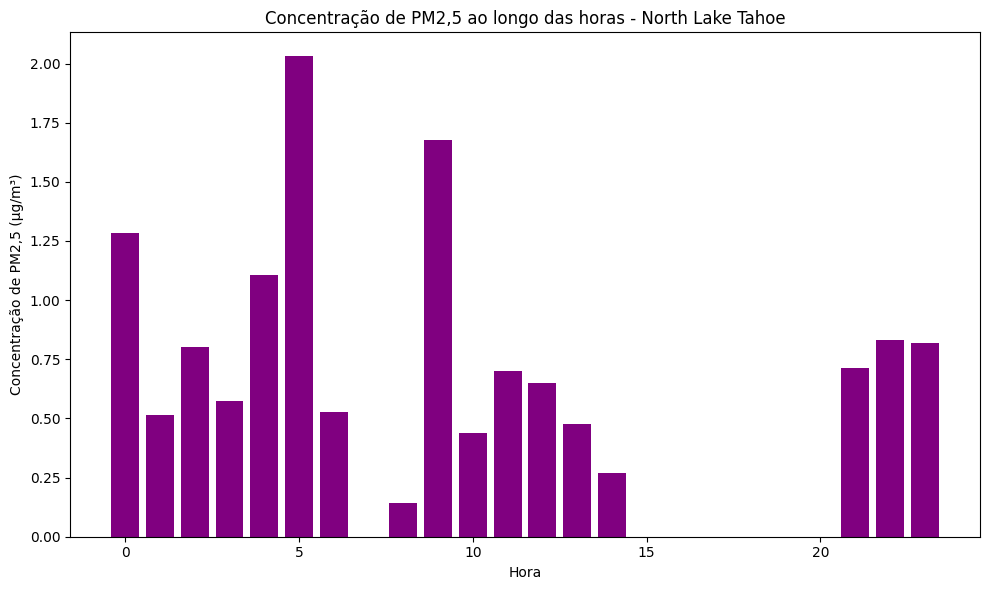

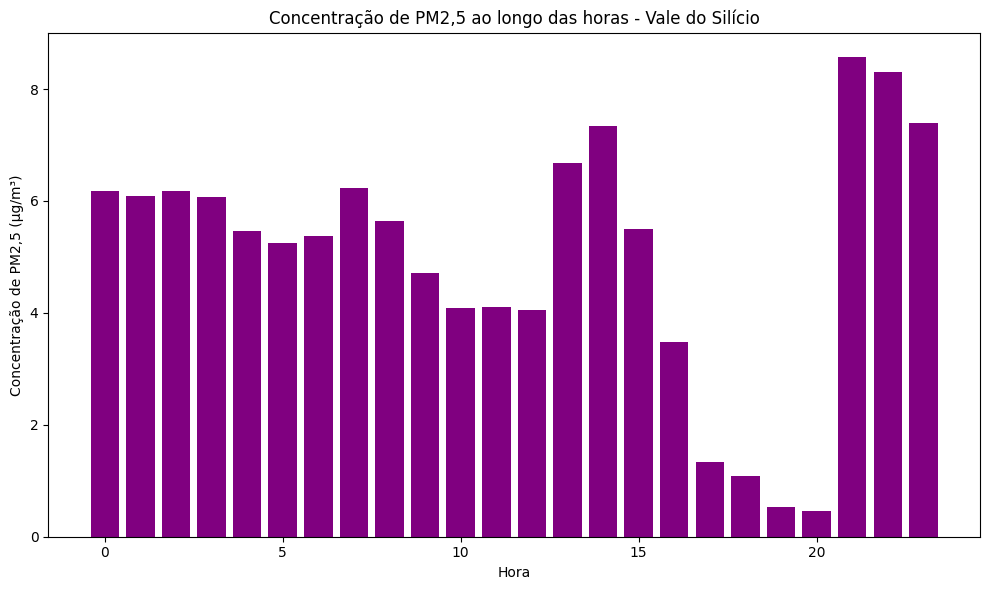

In [129]:
# Coordenadas dos pontos
latitudes = [39.2345, 38]  # North Lake Tahoe e Vale do Silício
longitudes = [-120.3334, -122.3930]

def find_nearest_idx(arr, value):
    return np.argmin(np.abs(arr - value))

# Encontrar os índices de latitude e longitude para os pontos
lat_idx_nlt = find_nearest_idx(dataset['lat'].values, latitudes[0])
lon_idx_nlt = find_nearest_idx(dataset['lon'].values, longitudes[0])

lat_idx_vds = find_nearest_idx(dataset['lat'].values, latitudes[1])
lon_idx_vds = find_nearest_idx(dataset['lon'].values, longitudes[1])

# Extrair os valores de PM2,5 para esses pontos ao longo do tempo
pm25_nlt = pm25[:, lat_idx_nlt, lon_idx_nlt] 
pm25_vds = pm25[:, lat_idx_vds, lon_idx_vds]

# Definir a variável 'time' como o índice temporal
time = np.arange(len(pm25))  

# North Lake Tahoe
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(time, pm25_nlt, color='purple')  # Cor roxa para manter o padrão
ax.set_xlabel('Hora')
ax.set_ylabel('Concentração de PM2,5 (µg/m³)')
ax.set_title('Concentração de PM2,5 ao longo das horas - North Lake Tahoe')
plt.tight_layout()
plt.show()

# Vale do Silício
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(time, pm25_vds, color='purple')  # Cor roxa para manter o padrão
ax.set_xlabel('Hora')
ax.set_ylabel('Concentração de PM2,5 (µg/m³)')
ax.set_title('Concentração de PM2,5 ao longo das horas - Vale do Silício')
plt.tight_layout()
plt.show()


#transformar em linhas, arrumar as horas e colocar linha tracejada da california e do brasil - legislação